# **Import libraries**

In [ ]:
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from os import listdir
import random

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from sklearn import metrics
from tensorflow.keras.utils import img_to_array,load_img
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Loading Oxford Dataset**

In [ ]:
input_dir = "/content/drive/MyDrive/data/photos"

In [ ]:
input_img_paths = sorted(
    [os.path.join(input_dir,fname)
     for fname in os.listdir(input_dir)
     if fname.endswith(".jpg")]
)

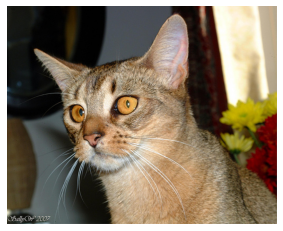

In [ ]:
img = load_img(input_img_paths[10])
plt.axis("off")
plt.imshow(img)

In [ ]:
img_size = (256,256)
num_imgs = len(input_img_paths)

def path_to_colored_image(path):
  return img_to_array(load_img(path, target_size = img_size))

colored_imgs = np.zeros((num_imgs,) + img_size + (3,), dtype = "float32")

for i in range(num_imgs):
  colored_imgs[i] = path_to_colored_image(input_img_paths[i])

In [ ]:
gray_imgs= []
for img in colored_imgs:
  img =cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  gray_imgs.append(img)

gray_imgs = np.array(gray_imgs)

In [ ]:
print(colored_imgs.shape)
print(gray_imgs.shape)


(1000, 256, 256, 3)
(1000, 256, 256)


# **Spliting Dataset to Train and Test**

In [ ]:
x_train,x_test , y_train , y_test = train_test_split(gray_imgs , colored_imgs,shuffle=True,test_size=0.2)

In [ ]:
x_train=x_train /255
x_test = x_test /255
y_train=y_train /255
y_test=y_test /255
original = x_test.copy()

In [ ]:
x_train=x_train.reshape(len(x_train),256,256,1)
x_test=x_test.reshape(len(x_test),256,256,1)


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(800, 256, 256, 1)
(800, 256, 256, 3)
(200, 256, 256, 1)
(200, 256, 256, 3)


# **Architecture**

In [ ]:
#Encoder
encoder_input = Input(shape=(256, 256, 1,))
encoder_output = Conv2D(64, (3,3), activation='relu', padding='same', strides=2)(encoder_input)
encoder_output = Conv2D(128, (3,3), activation='relu', padding='same')(encoder_output)
encoder_output = Conv2D(128, (3,3), activation='relu', padding='same', strides=2)(encoder_output)
encoder_output = Conv2D(256, (3,3), activation='relu', padding='same')(encoder_output)
encoder_output = Conv2D(256, (3,3), activation='relu', padding='same', strides=2)(encoder_output)
encoder_output = Conv2D(512, (3,3), activation='relu', padding='same')(encoder_output)
encoder_output = Conv2D(512, (3,3), activation='relu', padding='same')(encoder_output)
encoder_output = Conv2D(256, (3,3), activation='relu', padding='same')(encoder_output)
#Decoder
decoder_output = Conv2D(128, (3,3), activation='relu', padding='same')(encoder_output)
decoder_output = UpSampling2D((2, 2))(decoder_output)
decoder_output = Conv2D(64, (3,3), activation='relu', padding='same')(decoder_output)
decoder_output = UpSampling2D((2, 2))(decoder_output)
decoder_output = Conv2D(32, (3,3), activation='relu', padding='same')(decoder_output)
decoder_output = Conv2D(16, (3,3), activation='relu', padding='same')(decoder_output)
decoder_output = Conv2D(3, (3, 3), activation='tanh', padding='same')(decoder_output)
decoder_output = UpSampling2D((2, 2))(decoder_output)
model = Model(inputs=encoder_input, outputs=decoder_output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 64)      640       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       147584    
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 256)       295168    
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 256)       590080    
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 512)       118016

In [ ]:
model.compile(optimizer='adam', loss='mse' , metrics=['accuracy'])

In [ ]:
history=model.fit(x_train,y_train,validation_split=0.1, epochs=150)

Epoch 1/150
23/23 [==============================] - 22s 513ms/step - loss: 0.0965 - accuracy: 0.5450 - val_loss: 0.0337 - val_accuracy: 0.6489
Epoch 2/150
23/23 [==============================] - 8s 349ms/step - loss: 0.0270 - accuracy: 0.6289 - val_loss: 0.0230 - val_accuracy: 0.6256
Epoch 3/150
23/23 [==============================] - 8s 357ms/step - loss: 0.0202 - accuracy: 0.6042 - val_loss: 0.0188 - val_accuracy: 0.6275
Epoch 4/150
23/23 [==============================] - 8s 356ms/step - loss: 0.0169 - accuracy: 0.5980 - val_loss: 0.0150 - val_accuracy: 0.6490
Epoch 5/150
23/23 [==============================] - 8s 346ms/step - loss: 0.0152 - accuracy: 0.5865 - val_loss: 0.0139 - val_accuracy: 0.6134
Epoch 6/150
23/23 [==============================] - 8s 343ms/step - loss: 0.0139 - accuracy: 0.5744 - val_loss: 0.0132 - val_accuracy: 0.6195
Epoch 7/150
23/23 [==============================] - 8s 339ms/step - loss: 0.0137 - accuracy: 0.6015 - val_loss: 0.0126 - val_accuracy: 0.645

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy*100," %")

7/7 [==============================] - 2s 255ms/step - loss: 0.0099 - accuracy: 0.6007
Test Loss: 0.009900610893964767
Test Accuracy: 60.071730613708496  %


# **Display Prediction image**

In [ ]:
Prediction = model.predict(x_test)
Prediction.shape

7/7 [==============================] - 1s 103ms/step


(200, 256, 256, 3)

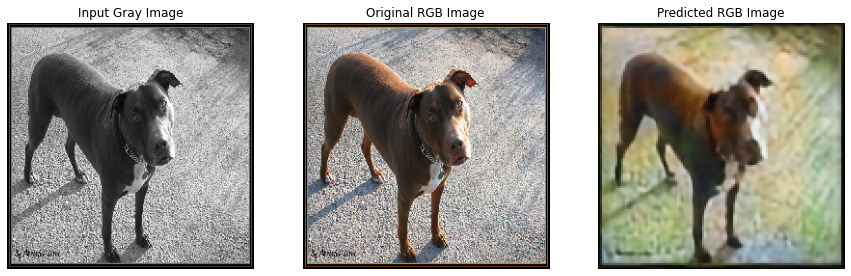

In [ ]:
i = 20
plt.figure(figsize=(15, 15))
plt.subplot(1, 3, 1)
plt.title("Input Gray Image")
plt.imshow(original[i],cmap='gray')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Original RGB Image")
plt.imshow(y_test[i])
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Predicted RGB Image")
plt.imshow(Prediction[i])
plt.axis("off")

plt.show()